# ML_SP22_Project_2 (Classical Machine Learning Model Building)

**Exploratory Data Analysis(EDA)**

 Exploratory Data Analysis (EDA) is an approach to analyzing datasets to summarize their main characteristics, often with visual methods. EDA is used for seeing what the data can tell us before the modeling task.

**Import Libaries**

We will start by importing the libraries we will require for performing EDA. These include NumPy, Pandas, Matplotlib, and Seaborn.

In [ ]:
#all the imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy   
from sklearn.preprocessing import LabelEncoder,OneHotEncoder 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from numpy import mean   
from numpy import absolute  
from numpy import sqrt  
%matplotlib inline
warnings.filterwarnings('ignore')

**Load DataSet**

Read the data from a CSV file using Pandas libaray.

In [ ]:
#load the dataset 
wine_data=pd.read_csv('/content/wine-tasting.csv')

let look at our dataset looks like using head() fucntion . The output should look like this:

In [ ]:
#read the dataset
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,type,pHValue,taste
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,0.45,8.8,white,very acidic,normal
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,0.49,9.5,white,quite acidic,normal
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,0.44,10.1,white,quite acidic,normal
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,0.40,9.9,white,very acidic,normal
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,0.40,9.9,white,very acidic,normal


In [ ]:
#checking the rows and coloumn 
shape=wine_data.shape
print('row and columns of the dataset is',shape,'respectively')

row and columns of the dataset is (6498, 13) respectively


In [ ]:
#checking the columns names 
col_name=wine_data.columns
print('Columns names:-',col_name)

Columns names:- Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'sulphates', 'alcohol', 'type', 'pHValue', 'taste'],
      dtype='object')


**Targeted column:-**
The **taste** column is our target variable.

In [ ]:
#checking the data types of the columns
wine_data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
sulphates               float64
alcohol                 float64
type                     object
pHValue                  object
taste                    object
dtype: object

**Checking the uniqueness**

To check the uniqueness of the selected columns we use **unique() function**.It is used to find the unique elements of an array. Returns the sorted unique elements of an array

In [ ]:
#uniques of the taste columns
wine_data.taste.unique()

array(['normal', 'bad', 'good'], dtype=object)

**Selecting of the value of the Taste columns**

we select the values of the taste columns by using **isin() method**.It is  used to filter data frames. This method helps in selecting rows with having a particular(or Multiple) value in a particular column

In [ ]:
#selection of values of colums taste
wine_data=wine_data[wine_data['taste'].isin(['bad','good'])]

In [ ]:
#after selection of the uniqued values
wine_data['taste'].unique()

array(['bad', 'good'], dtype=object)

**Checking for missing values**

In [ ]:
#checking the null values in the cols 
wine_data.isnull().sum()/len(wine_data)

fixed acidity           0.000273
volatile acidity        0.000000
citric acid             0.000000
residual sugar          0.000000
chlorides               0.000000
free sulfur dioxide     0.000000
total sulfur dioxide    0.000000
density                 0.000000
sulphates               0.000000
alcohol                 0.000000
type                    0.000000
pHValue                 0.000000
taste                   0.000000
dtype: float64

***Dropna()***
To remove the missing values we use **dropna() method**.It removes the rows that contains NULL values.

In [ ]:
#The dropna() method removes the rows that contains NULL values.
wine_data=wine_data.dropna()

In [ ]:
#after removing the null values from the rows
wine_data.isnull().sum()/len(wine_data)

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
sulphates               0.0
alcohol                 0.0
type                    0.0
pHValue                 0.0
taste                   0.0
dtype: float64

there is no null values 

***chechking the infomartion of the columns***
we used info() method to prints information about the wine_data . The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).

In [ ]:
#Check the data types of each attribute.
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3661 entries, 10 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3661 non-null   float64
 1   volatile acidity      3661 non-null   float64
 2   citric acid           3661 non-null   float64
 3   residual sugar        3661 non-null   float64
 4   chlorides             3661 non-null   float64
 5   free sulfur dioxide   3661 non-null   float64
 6   total sulfur dioxide  3661 non-null   float64
 7   density               3661 non-null   float64
 8   sulphates             3661 non-null   float64
 9   alcohol               3661 non-null   float64
 10  type                  3661 non-null   object 
 11  pHValue               3661 non-null   object 
 12  taste                 3661 non-null   object 
dtypes: float64(10), object(3)
memory usage: 400.4+ KB


##**Detecting and Removing outliers**

**Detecting Outliers**

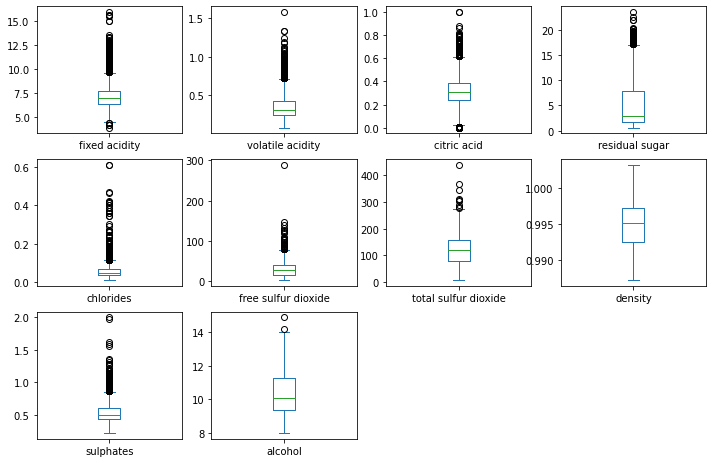

In [ ]:
#checking the outlier by usning the box plot
wine_data.plot(kind="box",subplots=True,layout=(8,4),figsize=(12,22));

we have  outlier in **sulphate,total sulfur Dioxie,free sulfur dioxide,residual sugar,chlorides,fixed acidity, volatile acidity and citric acid**

**Removing Outlier**

In [ ]:
#selecting the numerical data 
wine_data1=wine_data.select_dtypes(exclude='object')

***Removing the Outlier using z score method***
To remove the outlier we use **SciPy** method.This mehtod is a collection of mathematical algorithms and convenience functions built on the NumPy extension of Python.SciPy is also pronounced as “Sigh P

In [ ]:
#using the z method
z_scores = scipy.stats.zscore(wine_data1)
#calculate z-scores of `wine_data`
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 2).all(axis=1) #filtered entries tells the index of th outliers
wine_data= wine_data[filtered_entries]  

In [ ]:
#checking the row and cols
outlier_removed=wine_data.shape
print('After the removing the outlier,the row and columns are',outlier_removed,'respectivley')

After the removing the outlier,the row and columns are (2580, 13) respectivley


#**Data Exploraion**

**Descriptive Statistics**

For descriptive statistic parameters for the dataset,We will use **describe()** function.By assigning include attribute a value of ‘all’, we make sure that categorical features are also included in the result. 
The output DataFrame should look like this:

In [ ]:
wine_data.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,type,pHValue,taste
count,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580,2580,2580
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,6,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,white,very acidic,bad
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2094,1055,1629
mean,7.073585,0.324955,0.309341,4.854612,0.050626,29.550388,119.992248,0.994261,0.505488,10.434668,NaN,NaN,NaN
std,0.932097,0.134222,0.110984,3.868049,0.019788,15.284423,50.325984,0.002569,0.112804,1.118858,NaN,NaN,NaN
min,4.800000,0.080000,0.030000,0.600000,0.012000,2.000000,7.000000,0.988900,0.250000,8.400000,NaN,NaN,NaN
25%,6.400000,0.230000,0.250000,1.700000,0.037000,17.000000,89.000000,0.992120,0.420000,9.500000,NaN,NaN,NaN
50%,7.000000,0.290000,0.310000,2.900000,0.046000,29.000000,122.000000,0.994300,0.490000,10.300000,NaN,NaN,NaN
75%,7.600000,0.390000,0.370000,7.525000,0.058000,41.000000,155.000000,0.996280,0.580000,11.300000,NaN,NaN,NaN


**location Checking**

In [ ]:
#location of the Taste column data
wine_taste1=wine_data.loc[wine_data['taste']=='good']
wine_taste1["taste"].head()

13    good
15    good
17    good
20    good
21    good
Name: taste, dtype: object

In [ ]:
#location of the Taste column data
wine_taste2=wine_data.loc[wine_data['taste']=='bad']
wine_taste2["taste"].head()

10    bad
11    bad
12    bad
19    bad
23    bad
Name: taste, dtype: object

##**Graphical Representation of the data set**

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.,
        1800.]), <a list of 10 Text major ticklabel objects>)

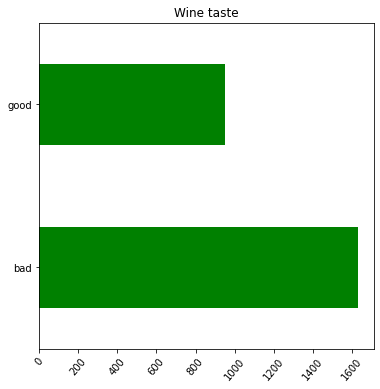

In [ ]:
#taste col graph
wine_data['taste'].value_counts().plot(kind='barh', title='Wine taste',figsize=(6,6),color='Green')
plt.xticks(rotation=50)

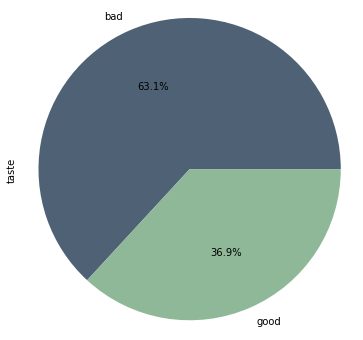

In [ ]:
#Taste Colunm with  pie representation 
wine_data["taste"].value_counts().plot(kind="pie",autopct="%1.1f%%",figsize=(6,6),colors = ['#4F6275','#8EB897'])
plt.axis("equal")
plt.show()

There is 63.1% of bad wine and 63.9% of good wine taste in given dataset

Text(0, 0.5, 'Counts')

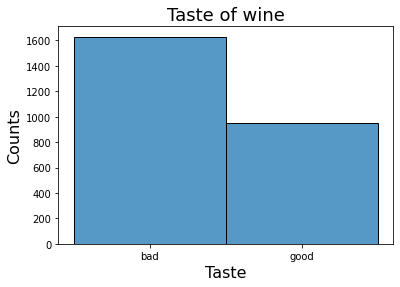

In [ ]:
#histrogram plotting
sns.histplot(wine_data['taste'])
plt.title('Taste of wine', fontsize=18)
plt.xlabel('Taste', fontsize=16)
plt.ylabel('Counts', fontsize=16)

**Data Separated**
:-separated data set into training and testing

**Label encoding**
we do LabelEncoder.it encode labels with a value between 0 and n_classes-1 where n is the number of distinct labels. 

In [ ]:
#do label enconder 
le = LabelEncoder()
wine_data['taste']=le.fit_transform(wine_data['taste'])

***Drop the column***

In [ ]:
#Drop the taste column
X=wine_data.drop(columns=['taste'])
y=wine_data['taste'].values
y

array([0, 0, 0, ..., 1, 0, 0])

**One Hot Encoding:-**it is essential process of converting the categorical data variables to be provided to machine and deep learning algorithms which in turn improve predictions as well as classification accuracy of a model.we do one hot encoding to convert the categorical data into numerical data so we gets the better results for algorithms

In [ ]:
#get dumnies of the X
X=pd.get_dummies(X)

In [ ]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,type_red,type_white,pHValue_acidic,pHValue_extremly acidic,pHValue_lightly acidic,pHValue_midly acidic,pHValue_quite acidic,pHValue_very acidic
10,8.1,0.27,0.41,1.45,0.033,11.0,63.0,0.9908,0.56,12.0,0,1,0,1,0,0,0,0
11,8.6,0.23,0.40,4.20,0.035,17.0,109.0,0.9947,0.53,9.7,0,1,0,0,0,0,0,1
12,7.9,0.18,0.37,1.20,0.040,16.0,75.0,0.9920,0.63,10.8,0,1,0,0,0,0,0,1
13,6.6,0.16,0.40,1.50,0.044,48.0,143.0,0.9912,0.52,12.4,0,1,0,0,0,1,0,0
15,6.6,0.17,0.38,1.50,0.032,28.0,112.0,0.9914,0.55,11.4,0,1,0,0,0,0,1,0


***plot the Bar graph for 0 and 1***

Text(0.5, 1.0, 'Wine taste (0=bad, 1=good)')

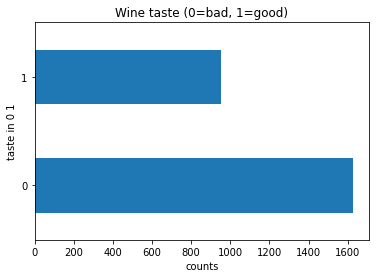

In [ ]:
pd.Series(wine_data['taste']).value_counts().sort_index().plot(kind = 'barh')
plt.ylabel("taste in 0 1")
plt.xlabel("counts")
plt.title('Wine taste (0=bad, 1=good)')

**Standardization**

Standardization: StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance.from the sklearn lib we import the standard scaler

In [ ]:
#Standardization
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

**Data Splitting**

Split the data into two datas 

1.   Train data
2.   Test data



In [ ]:
# Spliting the  the train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#**Model Implementataion**

**Function of Evaluation Metrics**

It is used to measure the quality of the machine learning model.Metrics like accuracy, precision, recall are good ways to evaluate classification models for balanced datasets

In [ ]:
# function for evaluation metrics precision, recall, f1 etc
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
def modelEvaluation(predictions, y_test_set, model_name):
    # Print model evaluation to predicted result    
    print("==========",model_name,"==========")
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test_set, predictions)))    
    print ("\nClassification report : \n", classification_report(y_test_set, predictions))
    print ("\nConfusion Matrix : \n", confusion_matrix(y_test_set, predictions))
    sns.heatmap(confusion_matrix(y_test_set, predictions),annot=True, fmt='g',cmap='viridis')
    plt.tight_layout()
    plt.show()
    results = [accuracy_score(y_test_set, predictions), precision_score(y_test_set, predictions, average='macro'),
              recall_score(y_test_set, predictions, average='macro'),f1_score(y_test_set, predictions, average='macro')]
    return results

**OverSampling**

we do data balcancing for getting the better results from the model. the methid we used is **SMOTE**.Smote is (synthetic minority oversampling) technique,that is most commonly used oversampling methods for the imbalance data.SMOTE synthesises new minority instances between existing minority instances

In [ ]:
# Balancing the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

**Random Forest Classifier**

========== Random Forest Classifier ==========

Accuracy on validation set: 0.8862

Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.90      0.91       554
           1       0.82      0.87      0.84       298

    accuracy                           0.89       852
   macro avg       0.87      0.88      0.88       852
weighted avg       0.89      0.89      0.89       852


Confusion Matrix : 
 [[497  57]
 [ 40 258]]


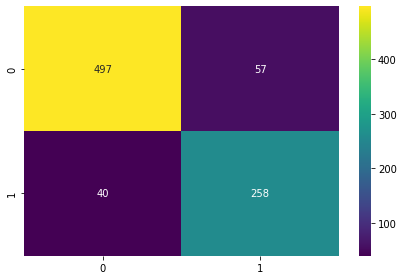

In [ ]:
#import the RFC from the Sklearn 
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
results_rfc = modelEvaluation(y_test, y_pred_rfc, "Random Forest Classifier")

**Cross-Validation**

It is resampling technique with the fundamental idea of splitting the dataset into 2 parts 

1.   Trainning Data
2.   Test Data

Train data is used to train the model and the unseen test data is used for prediction

we did cross validation on the Random forest classifier becuase its gave the good accuracy  88.15%


In [ ]:
#define cross-validation method to use
cv = KFold(n_splits=10, random_state=1, shuffle=True)

#build multiple linear regression model
model = RandomForestClassifier()

#use k-fold CV to evaluate model
scores = cross_val_score(model, X, y,cv=cv, n_jobs=-1)

#view mean absolute error
mean_score=mean(scores)*100
print('The Mean score the best model after cross validation is ',mean_score)

The Mean score the best model after cross validation is  92.66285983954695


##**Part Two of the task**
***You should have also done the following***

**Implement the 3 models**  
1.   logistic regression    
2.  Decision Tree
3. Random Forecast




**Logictic regression**

========== logistic Regression ==========

Accuracy on validation set: 0.8134

Classification report : 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       538
           1       0.75      0.75      0.75       314

    accuracy                           0.81       852
   macro avg       0.80      0.80      0.80       852
weighted avg       0.81      0.81      0.81       852


Confusion Matrix : 
 [[458  80]
 [ 79 235]]


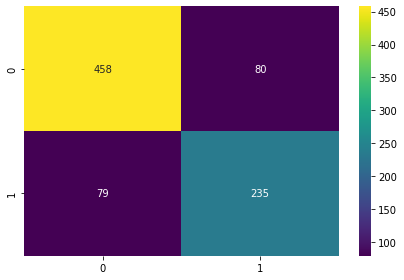

In [ ]:
#logistic regression model form the sklearn lib
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
results_lr = modelEvaluation(y_test, y_pred_lr, "logistic Regression")

**Random Forest**

========== Random Forest Classifier ==========

Accuracy on validation set: 0.8873

Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.90      0.91       555
           1       0.82      0.87      0.84       297

    accuracy                           0.89       852
   macro avg       0.87      0.88      0.88       852
weighted avg       0.89      0.89      0.89       852


Confusion Matrix : 
 [[498  57]
 [ 39 258]]


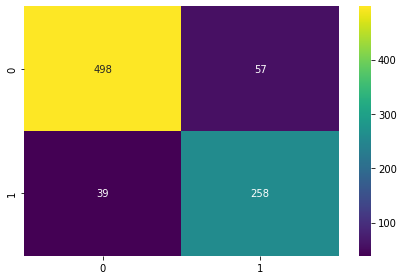

In [ ]:
#import the Random forest from the Sklearn 
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
results_rfc = modelEvaluation(y_test, y_pred_rfc, "Random Forest Classifier")

**Decision Tree Classifier**

========== Decision Tree Classifier ==========

Accuracy on validation set: 0.8275

Classification report : 
               precision    recall  f1-score   support

           0       0.86      0.87      0.86       537
           1       0.77      0.76      0.76       315

    accuracy                           0.83       852
   macro avg       0.82      0.81      0.81       852
weighted avg       0.83      0.83      0.83       852


Confusion Matrix : 
 [[467  70]
 [ 77 238]]


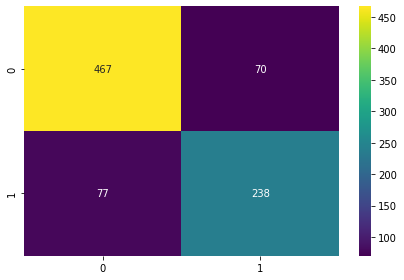

In [ ]:
#Import the Decision Tree Classifer from the Sklearn 
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
results_dtc = modelEvaluation(y_pred, y_test, "Decision Tree Classifier")

**Ploting the accuriess of the implemented models**

In [ ]:
#accuracies of the algorithm we implement above
accuracies=[['RFC',0.8862],['DTC',0.8275],['LR',0.8134]]
scores=pd.DataFrame(accuracies,columns=['model','accuracy'])

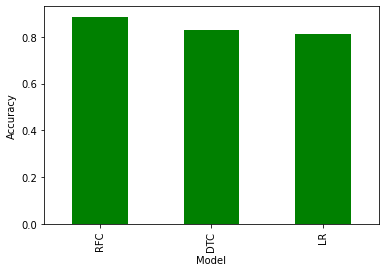

In [ ]:
#accuracy ploted
scores.set_index('model').accuracy.plot(kind='bar',color='green')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

#**Compare the sklearn Decision Tree with your own Decision Tree implementation results**

##**Own Decision Tree Implementation**

In [ ]:
from DT_muhammad_niazi import DecisionTree
model = DecisionTree(max_depth=10)
X_train=np.array(X_train)
y_train=np.array(y_train)

model.fit(X_train, y_train)


Done fitting


In [ ]:
from DT_muhammad_niazi import accuracy_score
predictions = model.predict(np.array(X_test))
print(accuracy_score(y_test, predictions))

0.8157276995305164


we got the accuracy from the sklearn deciosin tree model is **82.750%**
and form own decision tree classifier model have accuracy **81.13%**


#**Ensembel models**

**GradientBoostingClassifier**

========== Gradient Boosting Classifier ==========

Accuracy on validation set: 0.8568

Classification report : 
               precision    recall  f1-score   support

           0       0.91      0.87      0.89       563
           1       0.77      0.83      0.80       289

    accuracy                           0.86       852
   macro avg       0.84      0.85      0.84       852
weighted avg       0.86      0.86      0.86       852


Confusion Matrix : 
 [[489  74]
 [ 48 241]]


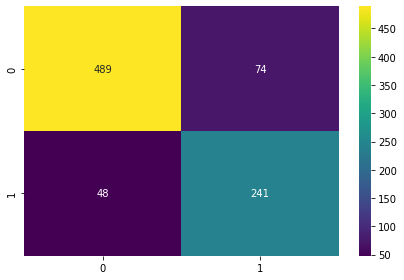

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
rfc = GradientBoostingClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
results_rfc = modelEvaluation(y_test, y_pred_rfc, "Gradient Boosting Classifier")

# Best Model

*The Random forest classifier is best model because it give the good and high accuracy among all other models*

## 3rd task Answer the following the questions

**Answer no 1**
similar

**Answer no 2**
The ensamble model we implment in the task,not have improved accuracy

**Answer no 3**
Categorical value ph is important, where this value will be missing it will fill it with unknown or new label
